## Описание исследуемого датасета.
   **Тема датасета:** Топ стримеры на платформе Twitch  
   **Предметная область:** аналитика производительности и экономики цифрового контента в рамках платформы для live-стриминга Twitch, сравнительный анализ ключевых метрик самых успешных каналов платформы.  
   **Источник:** https://www.kaggle.com/datasets/aayushmishra1512/twitchdata  
  **Характер данных:** Реальные данные.  
   **Атрибуты датасета:**  
       - Channel (строковый тип): никнейм стримера;  
       - Watch time (числовой тип): суммарное время в минутах, которое зрители провели за просмотром канала.  
       - Stream time (числовой тип): общее время в минутах, которое канал был в эфире.   
       - Peak viewers (числовой тип): максимальное количество одновременных зрителей на канале.   
       - Average viewers (числовой тип): среднее количество зрителей на канале.  
       - Followers (числовой тип): количество подписчиков канала.  
       - Followers gained (числовой тип): количество новых подписчиков, полученных за измеряемый период.   
       - Viewers gained (числовой тип): Количество просмотров канала, полученных за измереняемый период.  
       - Partnered (логический тип): является ли канал партнером Twitch  
       - Mature (логический тип): помечен ли канал как "для взрослых".  
       - Language (строковый тип): язык вещания канала.
## Выполнение работы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('twitchdata.csv')

**Среднее значение и СКО атрибутов**

In [3]:
num_columns = df.select_dtypes(include=[np.number]).columns
av_df = pd.DataFrame({
    'Атрибут': num_columns,
    'Среднее': df[num_columns].mean().values,
    'СКО': df[num_columns].std().values,
})
stats_df_formatted = av_df.copy()
for col in ['Среднее', 'СКО']:
    stats_df_formatted[col] = av_df[col].apply(lambda x: f'{x:,.2f}')
display(stats_df_formatted)

,Атрибут,Среднее,СКО
0,Watch time(Minutes),"418,427,930.13","549,635,514.08"
1,Stream time(minutes),"120,515.16","85,376.20"
2,Peak viewers,"37,065.05","60,314.31"
3,Average viewers,"4,781.04","8,453.68"
4,Followers,"570,054.07","804,413.37"
5,Followers gained,"205,518.53","339,913.71"
6,Views gained,"11,668,165.61","24,905,722.45"


**Гистограмма распределения значений**

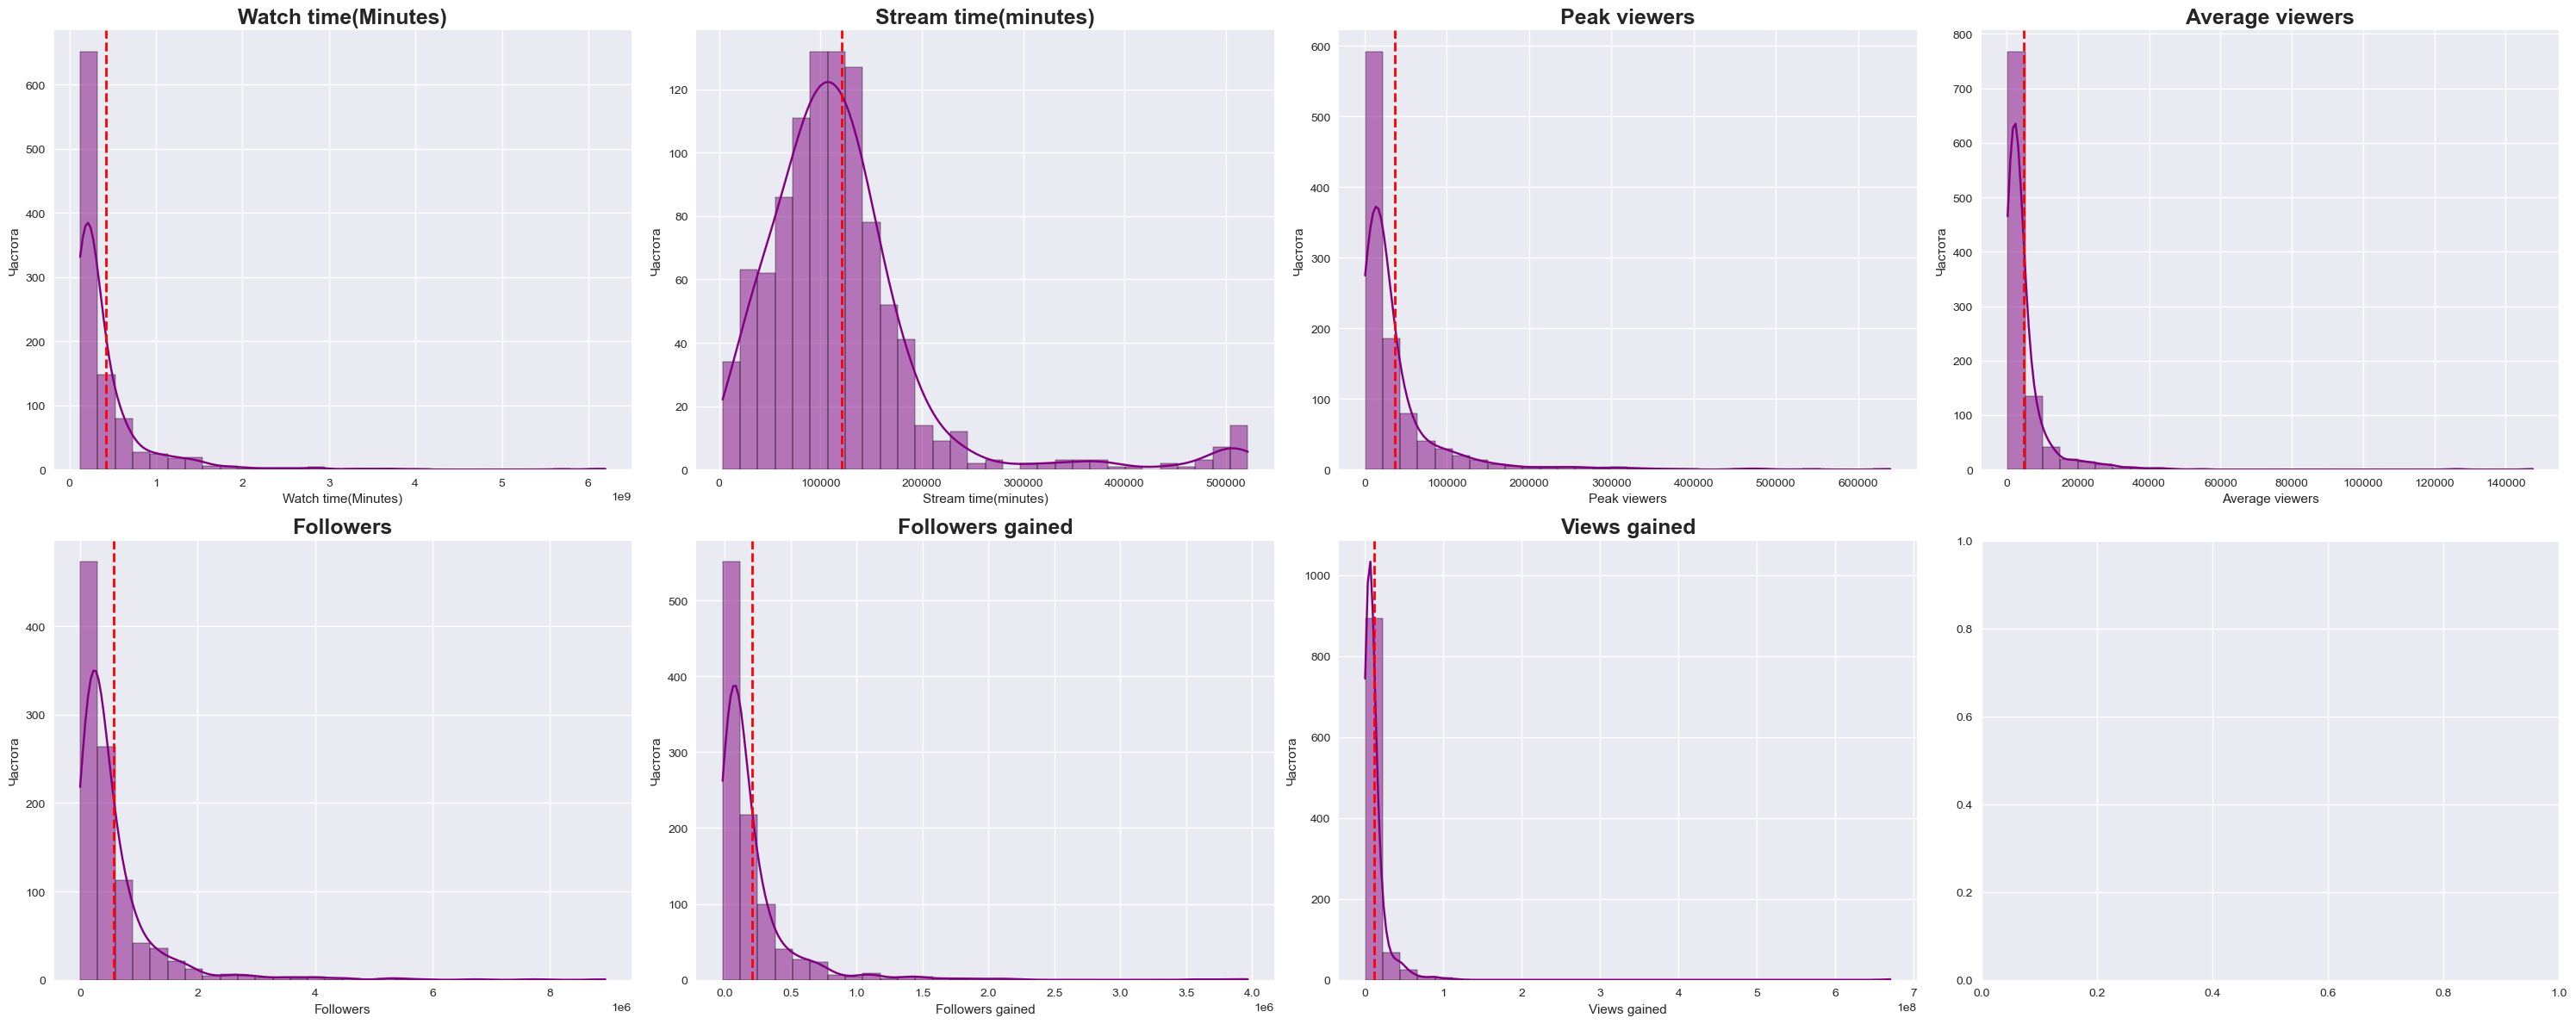

In [4]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
fig, axes = plt.subplots(2, 4, figsize=(30, 12))
axes = axes.flatten()
for i, column in enumerate(num_columns):
    if i >= len(axes):
        break
        
    sns.histplot(df[column], ax=axes[i], kde=True, bins=30, color='purple')
    axes[i].set_title(f'{column}', fontsize=18, fontweight='bold')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Частота')
    
    mean_val = df[column].mean()
    median_val = df[column].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2)
    

plt.tight_layout()

**Определение наличия выбросов**

In [5]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("ВЫБРОСЫ ПО МЕТОДУ IQR:")
print(" ")
for column in num_columns:
    outliers, lower, upper = detect_outliers_iqr(df, column)
    print(f"{column}: {len(outliers)} выбросов    (границы: [{lower:.2f}, {upper:.2f}])")

ВЫБРОСЫ ПО МЕТОДУ IQR:
 
Watch time(Minutes): 107 выбросов    (границы: [-242635141.88, 839564953.12])
Stream time(minutes): 48 выбросов    (границы: [-28368.75, 243971.25])
Peak viewers: 113 выбросов    (границы: [-33570.25, 80253.75])
Average viewers: 100 выбросов    (границы: [-3535.00, 9779.00])
Followers: 89 выбросов    (границы: [-510132.75, 1305011.25])
Followers gained: 90 выбросов    (границы: [-244800.50, 524689.50])
Views gained: 91 выбросов    (границы: [-8593636.75, 24671001.25])


**Определение наличия пропущенных значений**

In [6]:
print(f"Общее количество пропущенных значений: {df.isnull().sum().sum()}")
print(f"Процент пропущенных значений: {df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100:.2f}%")

Общее количество пропущенных значений: 0
Процент пропущенных значений: 0.00%


**Корреляция параметров**

In [7]:
numeric_df = df[num_columns]
correlation_matrix = numeric_df.corr()
display(correlation_matrix.round(3))

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
Watch time(Minutes),1.000,0.151,0.583,0.476,0.620,0.515,0.530
Stream time(minutes),0.151,1.000,-0.120,-0.249,-0.091,-0.158,0.064
Peak viewers,0.583,-0.120,1.000,0.683,0.533,0.470,0.298
Average viewers,0.476,-0.249,0.683,1.000,0.428,0.420,0.250
Followers,0.620,-0.091,0.533,0.428,1.000,0.716,0.276
Followers gained,0.515,-0.158,0.470,0.420,0.716,1.000,0.244
Views gained,0.530,0.064,0.298,0.250,0.276,0.244,1.000


**Высококоррелированные пары**

In [8]:
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7: 
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

for col1, col2, corr in high_corr_pairs:
    if corr > 0:
        direct = "положительная"  
    else:
        direct = "отрицательная"
    if abs(corr) > 0.9:
        strength = "очень сильная" 
    elif abs(corr) > 0.7:
        strength =  "сильная" 
    else:
        strength = "умеренная"
    print(f"{col1} ↔ {col2}: {corr:.3f} ({strength} {direct} корреляция)")

Followers ↔ Followers gained: 0.716 (сильная положительная корреляция)


**Слабая корреляция**

In [9]:
weak_corr_threshold = 0.1
weak_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) < weak_corr_threshold:
            weak_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))

for col1, col2, corr in weak_correlated_pairs:
    print(f"{col1} ↔ {col2}: {corr:.3f}")

Stream time(minutes) ↔ Followers: -0.091
Stream time(minutes) ↔ Views gained: 0.064


**Наименьшая корреляция**

In [10]:
mean_correlation = correlation_matrix.abs().mean()
mean_correlation = mean_correlation.sort_values()

for attr, mean_corr in mean_correlation.items():
    print(f"{attr}: средняя |r| = {mean_corr:.3f}")

low_corr_attributes = mean_correlation[mean_correlation < 0.2]

Stream time(minutes): средняя |r| = 0.262
Views gained: средняя |r| = 0.380
Average viewers: средняя |r| = 0.501
Followers gained: средняя |r| = 0.503
Followers: средняя |r| = 0.523
Peak viewers: средняя |r| = 0.527
Watch time(Minutes): средняя |r| = 0.553


**Матрица графиков рассеивания**

<Figure size 2000x2000 with 0 Axes>

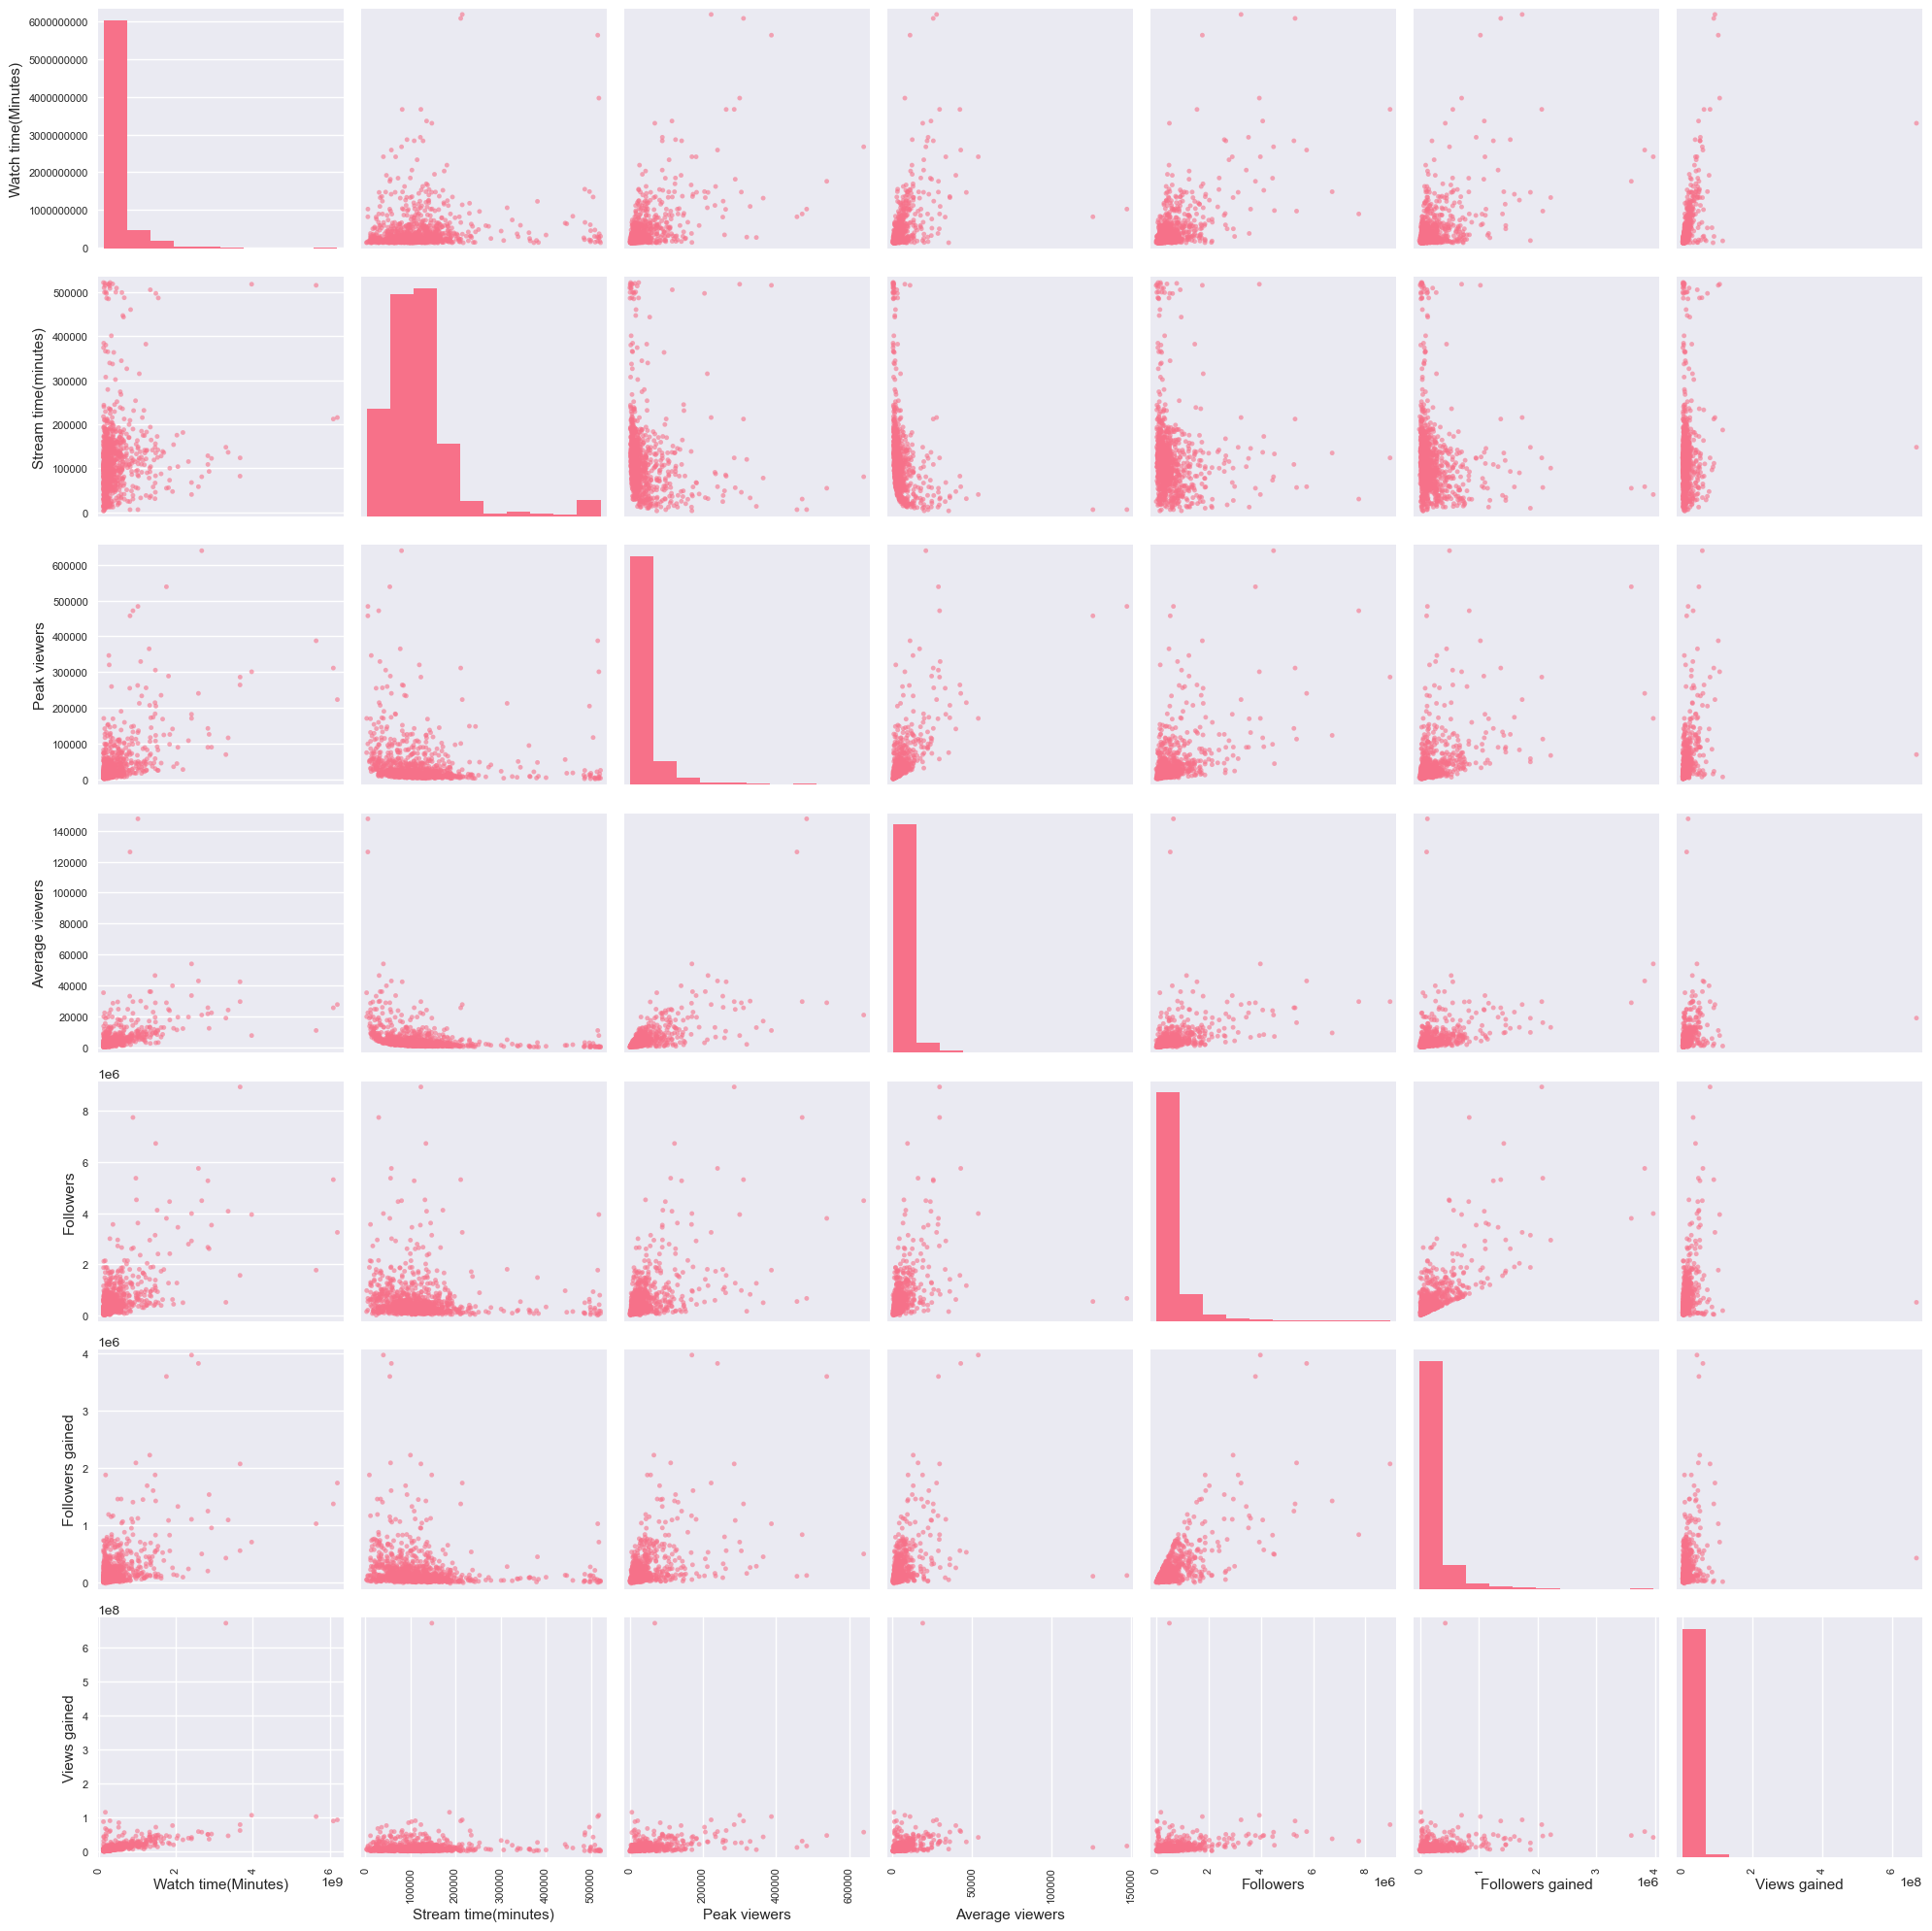

In [11]:
plt.figure(figsize=(20, 20))
pd.plotting.scatter_matrix(numeric_df, alpha=0.6, figsize=(20, 20), diagonal='hist')
plt.tight_layout()
plt.show()

**Анализ полученных результатов**
Графики рассеивания и матрица корреляций подтвердили, что большинство взаимосвязей метрик предсказуемы: увеличение времени трансляций закономерно ведет к росту общего времени просмотров, а стабильная средняя аудитория сильно коррелирует с приростом подписчиков. Это говорит о необходимости комплексного подхода к развитию канала. Он должен включать в себя оптимизацию времени трансляций, фокус на удержании средней аудитории и стратегию роста подписчиков. Такой подход поможет стримерам эффективнее развивать свои каналы, увеличивать монетизацию и строить устойчивое комьюнити в конкурентной среде live-стриминга.